Trends

In [377]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [378]:
# import file using pandas

city_file = os.path.join('raw_data', 'city_data.csv')
ride_file = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)
city_df.head()
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [379]:
#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merging both the sheets
merged_df = city_df.merge(ride_df, on = 'city')
merged_df.head()

#grouping by city
#group_city = merged_df.groupby('city')

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [380]:
#calculate average fare ($) per city
avg_fare = group_city.mean()['fare']

#Total Number of Rides Per City
total_rides = group_city['ride_id'].count()
                         
#Total Number of Drivers Per City
total_drivers = group_city['driver_count'].count()

#City Type (Urban, Suburban, Rural)

city_type = city_df.set_index('city')['type']

# dataframe from above series
rides_data = pd.DataFrame({
    "Total Number of Rides (Per City)": total_rides,
    "Average Fare ($)": avg_fare,
    "Number of Drivers": total_drivers,
    "Type of City": city_type
})
rides_data.head()

,Average Fare ($),Number of Drivers,Total Number of Rides (Per City),Type of City
Alvarezhaven,23.928710,31,31,Urban
Alyssaberg,20.609615,26,26,Urban
Anitamouth,37.315556,9,9,Suburban
Antoniomouth,23.625000,22,22,Urban
Aprilchester,21.981579,19,19,Urban


# Bubble plot - Ride Sharing Data

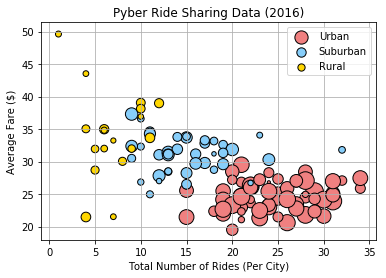

In [381]:
#Bubble Plot Data
urban_df = rides_data.loc[rides_data['Type of City'] == 'Urban']
suburban_df = rides_data.loc[city_info['Type of City'] == 'Suburban']
rural_df = rides_data.loc[city_info['Type of City'] == 'Rural']

ax = urban_df.plot(kind='scatter',x='Total Number of Rides (Per City)', y='Average Fare ($)', grid ='true',
                      color ='lightcoral', s=rides_data['Number of Drivers']*10, edgecolor = 'black', label = 'Urban', title = 'Pyber Ride Sharing Data (2016)', )

suburban = suburban_df.plot(kind='scatter',x='Total Number of Rides (Per City)', y='Average Fare ($)',grid ='true', ax=ax,
                      color ='lightskyblue', s=rides_data['Number of Drivers']*5, edgecolor = 'black', label = 'Suburban', title = 'Pyber Ride Sharing Data (2016)')

rural = rural_df.plot(kind='scatter',x='Total Number of Rides (Per City)', y='Average Fare ($)',grid ='true',ax=ax,
                       color ='gold', s=rides_data['Number of Drivers']*3, edgecolor = 'black',label = 'Rural',title = 'Pyber Ride Sharing Data (2016)')


plt.show()

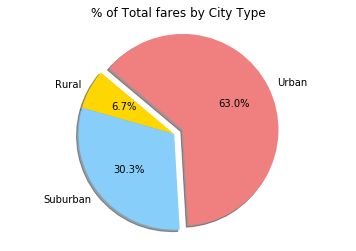

In [382]:
#Calculating % of Total Fares by City Type

citytype_df = merged_df.groupby('type')
total_fare = citytype_df.sum()['fare']

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "urban" section from the others
explode = (0.0, 0, 0.1)


plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total fares by City Type')
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()

In [383]:
#Calculating % of Total Rides by City Type

rides_count = citytype_df.count()['ride_id']
rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

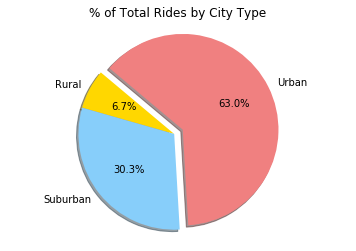

In [384]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "urban" section from the others
explode = (0.0, 0, 0.1)

plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()

In [385]:
#Calculating % of Total Drivers by City Type

drivers_count = citytype_df.count()['driver_count']
drivers_count

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

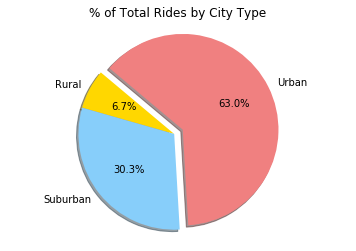

In [386]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "urban" section from the others
explode = (0.0, 0, 0.1)

plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()